In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nltk
from nltk.corpus import treebank
from nltk.corpus import brown

In [2]:
import seaborn as sns

In [3]:
from gensim.models import KeyedVectors

In [4]:
# from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import TimeDistributed
from keras.layers import LSTM, GRU, Bidirectional, SimpleRNN, RNN
from keras.models import Model
from keras.preprocessing.text import Tokenizer

In [5]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [6]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [7]:
# treebank_corpus = treebank.tagged_sents(tagset='universal')
brown_corpus = brown.tagged_sents(tagset='universal')

In [8]:
tagged_sentences = brown_corpus

In [9]:
X_sentences = []
Y_tags = []
for item in tagged_sentences:
  X = []
  Y = []
  for e in item:
    X.append(e[0])
    Y.append(e[1])
  X_sentences.append(X)
  Y_tags.append(Y)

In [10]:
X_sentences[1], Y_tags[1]

(['The',
  'jury',
  'further',
  'said',
  'in',
  'term-end',
  'presentments',
  'that',
  'the',
  'City',
  'Executive',
  'Committee',
  ',',
  'which',
  'had',
  'over-all',
  'charge',
  'of',
  'the',
  'election',
  ',',
  '``',
  'deserves',
  'the',
  'praise',
  'and',
  'thanks',
  'of',
  'the',
  'City',
  'of',
  'Atlanta',
  "''",
  'for',
  'the',
  'manner',
  'in',
  'which',
  'the',
  'election',
  'was',
  'conducted',
  '.'],
 ['DET',
  'NOUN',
  'ADV',
  'VERB',
  'ADP',
  'NOUN',
  'NOUN',
  'ADP',
  'DET',
  'NOUN',
  'ADJ',
  'NOUN',
  '.',
  'DET',
  'VERB',
  'ADJ',
  'NOUN',
  'ADP',
  'DET',
  'NOUN',
  '.',
  '.',
  'VERB',
  'DET',
  'NOUN',
  'CONJ',
  'NOUN',
  'ADP',
  'DET',
  'NOUN',
  'ADP',
  'NOUN',
  '.',
  'ADP',
  'DET',
  'NOUN',
  'ADP',
  'DET',
  'DET',
  'NOUN',
  'VERB',
  'VERB',
  '.'])

In [11]:
num_words = len(set([word.lower() for sentence in X_sentences for word in sentence]))
num_tags   = len(set([word.lower() for sentence in Y_tags for word in sentence]))


In [12]:
print("Total number of tagged sentences: {}".format(len(X)))
print("Vocabulary size: {}".format(num_words))
print("Total number of tags: {}".format(num_tags))

Total number of tagged sentences: 24
Vocabulary size: 49815
Total number of tags: 12


In [13]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_sentences)
X_encoded = word_tokenizer.texts_to_sequences(X_sentences)

In [14]:
tag_tokenizer = Tokenizer()
tag_tokenizer.fit_on_texts(Y_tags)
Y_encoded = tag_tokenizer.texts_to_sequences(Y_tags)

In [15]:
print("Raw", X_sentences[0], "\n", "Encoded", X_encoded[0])

Raw ['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'] 
 Encoded [1, 5433, 651, 2296, 1634, 62, 1846, 35, 2177, 4, 14222, 551, 1120, 1401, 1193, 14, 59, 473, 15, 9, 85, 9199, 213, 171, 3]


In [16]:
different_length = [1 if len(input) != len(output) else 0 for input, output in zip(X_encoded, Y_encoded)]
print("{} sentences have disparate input-output lengths.".format(sum(different_length)))

0 sentences have disparate input-output lengths.


In [17]:
lengths = [len(seq) for seq in X_encoded]
print("Length of longest sentence: {}".format(max(lengths)))

Length of longest sentence: 180


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


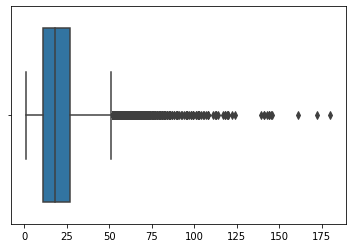

In [18]:
sns.boxplot(lengths)
plt.show()

In [19]:
from keras.utils import pad_sequences

In [20]:
MAX_SEQ_LENGTH = 100
X_padded = pad_sequences(X_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")
Y_padded = pad_sequences(Y_encoded, maxlen=MAX_SEQ_LENGTH, padding="pre", truncating="post")

In [21]:
print(X_padded[0], "\n"*3)
print(Y_padded[0])

[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     1  5433   651  2296  1634    62  1846    35  2177
     4 14222   551  1120  1401  1193    14    59   473    15     9    85
  9199   213   171     3] 



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 5 1 1 6 1 2 1 5 1 4 1 6 1 1 2 3 5 1 3 4 5 1 2 1 3]


In [22]:
X, Y = X_padded, Y_padded

In [23]:
path = '/content/drive/MyDrive/GoogleNews-vectors-negative300.bin'
word2vec = KeyedVectors.load_word2vec_format(path, binary=True)

In [24]:
# word2vec.most_similar(positive = ["King", "Woman"], negative = ["Man"])

In [25]:
EMBEDDING_SIZE  = 300  # each word in word2vec model is represented using a 300 dimensional vector
VOCABULARY_SIZE = len(word_tokenizer.word_index) + 1

# create an empty embedding matix
embedding_weights = np.zeros((VOCABULARY_SIZE, EMBEDDING_SIZE))

# create a word to index dictionary mapping
word2id = word_tokenizer.word_index

# copy vectors from word2vec model to the words present in corpus
for word, index in word2id.items():
    try:
        embedding_weights[index, :] = word2vec[word]
    except KeyError:
        pass

In [26]:
print("Embeddings shape: {}".format(embedding_weights.shape))

Embeddings shape: (49816, 300)


In [27]:
# embedding_weights[word_tokenizer.word_index['joy']]

array([ 0.4453125 , -0.20019531,  0.20019531, -0.03149414,  0.078125  ,
       -0.390625  ,  0.13671875, -0.13867188,  0.05395508,  0.10546875,
       -0.05029297, -0.23730469,  0.19921875,  0.12597656, -0.12695312,
        0.34179688,  0.06347656,  0.26757812, -0.07324219, -0.29101562,
        0.10498047,  0.11914062,  0.23730469,  0.00640869,  0.12451172,
       -0.00939941, -0.02770996,  0.03076172,  0.07421875, -0.22851562,
       -0.08056641, -0.05273438,  0.16894531,  0.19824219, -0.15625   ,
       -0.08740234,  0.10742188, -0.07177734,  0.05200195,  0.25976562,
        0.171875  , -0.13574219,  0.06738281,  0.00531006,  0.15527344,
       -0.03515625,  0.08789062,  0.3359375 , -0.12890625,  0.17578125,
       -0.08642578,  0.32421875, -0.09033203,  0.35351562,  0.24316406,
       -0.07470703, -0.06640625, -0.17578125,  0.06689453, -0.03833008,
        0.0100708 , -0.21484375, -0.03686523,  0.04394531,  0.02209473,
        0.00219727, -0.22460938,  0.03015137, -0.21582031,  0.16

In [28]:
Y = to_categorical(Y)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [31]:
TEST_SIZE = 0.15
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, random_state=4)

In [32]:
VALID_SIZE = 0.15
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=VALID_SIZE, random_state=4)

In [33]:
print("TRAINING DATA")
print('Shape of input sequences: {}'.format(X_train.shape))
print('Shape of output sequences: {}'.format(Y_train.shape))
print("-"*50)
print("VALIDATION DATA")
print('Shape of input sequences: {}'.format(X_validation.shape))
print('Shape of output sequences: {}'.format(Y_validation.shape))
print("-"*50)
print("TESTING DATA")
print('Shape of input sequences: {}'.format(X_test.shape))
print('Shape of output sequences: {}'.format(Y_test.shape))

TRAINING DATA
Shape of input sequences: (41428, 100)
Shape of output sequences: (41428, 100, 13)
--------------------------------------------------
VALIDATION DATA
Shape of input sequences: (7311, 100)
Shape of output sequences: (7311, 100, 13)
--------------------------------------------------
TESTING DATA
Shape of input sequences: (8601, 100)
Shape of output sequences: (8601, 100, 13)


RNN fixed embeddings

In [34]:
NUM_CLASSES = Y.shape[2]

In [35]:
# create architecture

rnn_model = Sequential()

# create embedding layer - usually the first layer in text problems
rnn_model.add(Embedding(input_dim     =  VOCABULARY_SIZE,         # vocabulary size - number of unique words in data
                        output_dim    =  EMBEDDING_SIZE,          # length of vector with which each word is represented
                        input_length  =  MAX_SEQ_LENGTH,          # length of input sequence
                        trainable     =  False                    # False - don't update the embeddings
))

# add an RNN layer which contains 64 RNN cells
rnn_model.add(SimpleRNN(64, 
              return_sequences=True  # True - return whole sequence; False - return single output of the end of the sequence
))

# add time distributed (output at each sequence) layer
rnn_model.add(TimeDistributed(Dense(NUM_CLASSES, activation='softmax')))


In [36]:
rnn_model.compile(loss      =  'categorical_crossentropy',
                  optimizer =  'adam',
                  metrics   =  ['acc'])

In [37]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          14944800  
                                                                 
 simple_rnn (SimpleRNN)      (None, 100, 64)           23360     
                                                                 
 time_distributed (TimeDistr  (None, 100, 13)          845       
 ibuted)                                                         
                                                                 
Total params: 14,969,005
Trainable params: 24,205
Non-trainable params: 14,944,800
_________________________________________________________________


In [38]:
rnn_training = rnn_model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_validation, Y_validation))

Epoch 1/10
324/324 [==============================] - 45s 130ms/step - loss: 0.5228 - acc: 0.8553 - val_loss: 0.3541 - val_acc: 0.8960
Epoch 2/10
324/324 [==============================] - 47s 144ms/step - loss: 0.2970 - acc: 0.9094 - val_loss: 0.2498 - val_acc: 0.9223
Epoch 3/10
324/324 [==============================] - 41s 128ms/step - loss: 0.2245 - acc: 0.9294 - val_loss: 0.2018 - val_acc: 0.9354
Epoch 4/10
324/324 [==============================] - 42s 129ms/step - loss: 0.1871 - acc: 0.9398 - val_loss: 0.1735 - val_acc: 0.9437
Epoch 5/10
324/324 [==============================] - 49s 152ms/step - loss: 0.1643 - acc: 0.9464 - val_loss: 0.1556 - val_acc: 0.9489
Epoch 6/10
324/324 [==============================] - 42s 129ms/step - loss: 0.1494 - acc: 0.9506 - val_loss: 0.1434 - val_acc: 0.9523
Epoch 7/10
324/324 [==============================] - 40s 123ms/step - loss: 0.1389 - acc: 0.9537 - val_loss: 0.1349 - val_acc: 0.9552
Epoch 8/10
324/324 [==============================] - 4

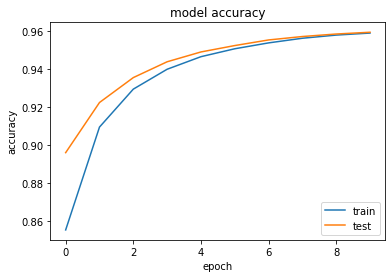

In [39]:
plt.plot(rnn_training.history['acc'])
plt.plot(rnn_training.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="lower right")
plt.show()